# Método de Runge Kutta -  Aula 29/09

In [84]:
import numpy as np
import csv
import pandas as pd

In [85]:
#Derivada
def f(tau, W): 
    return W - tau**2 + 1.0

In [86]:
#Analítica
def analitf(t): 
    return (t+1.0)**2 - np.exp(t)/2.0

## Range Kutta

In [99]:
def range_kutta(x, y0, h):
    y = np.zeros(len(x))
    y[0] = y0
    
    for i in np.arange(0, len(x)-1):
          
            k1 = f(x[i],y[i])
            k2 = f(x[i] + (h/2), y[i] + (h/2) * k1)
            k3 = f(x[i] + h, y[i] + h * k2)
            k4 = f(x[i] + h, y[i] + h * k3)
            
            y[i+1] = y[i] + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)
#             x[i+1] = x[i] + h
            print (y[i+1])
                
    return y            

## Euler

In [88]:
def euler(x, y0, h):
    y = np.zeros(len(x))
    y[0] = y0
    for i in np.arange(0, len(x)-1):
        y[i+1] = y[i] + f(x[i], y[i]) * h
                
    return y

In [89]:
#domínios
a  = 0.0
b  = 2.0
y0 = 0.5  #PVI confição inicial
N  = 20   # Número de interações
h  = 0.1  #intervalo (delta) h=(b-a)/100
#h  = 0.1 

In [90]:
x = np.arange(a, b, h) #ou t
len(x)

20

In [91]:
F = range_kutta(x, y0, h)
print (f'Solução Range Kutta: {F}')
len(F)

0.65990375
0.83444678378125
1.0230554600357087
1.2250947530550298
1.4398616840881935
1.6665780497996643
1.9043823726119766
2.1523209896678965
2.4093381882372755
2.6742652855302325
2.9458085399593466
3.222535768806163
3.5028615338664957
3.785030741836326
4.067100489802328
4.346919968048592
4.622108212296192
4.890029475246987
5.147765962677375
Solução Range Kutta: [0.5        0.65990375 0.83444678 1.02305546 1.22509475 1.43986168
 1.66657805 1.90438237 2.15232099 2.40933819 2.67426529 2.94580854
 3.22253577 3.50286153 3.78503074 4.06710049 4.34691997 4.62210821
 4.89002948 5.14776596]


20

In [92]:
E = euler(x, y0, h)
print (f'Solução Euler: {E}')
len(F)

Solução Euler: [0.5        0.65       0.814      0.9914     1.18154    1.383694
 1.5970634  1.82076974 2.05384671 2.29523139 2.54375452 2.79812998
 3.05694297 3.31863727 3.581501   3.8436511  4.10301621 4.35731783
 4.60404961 4.84045457]


20

In [93]:
analic = analitf(x)
print (f'Solução Analítica: {analic}')
len(analic)

Solução Analítica: [0.5        0.65741454 0.82929862 1.0150706  1.21408765 1.42563936
 1.6489406  1.88312365 2.12722954 2.38019844 2.64085909 2.90791699
 3.17994154 3.45535167 3.73240002 4.00915546 4.28348379 4.5530263
 4.81517627 5.06705278]


20

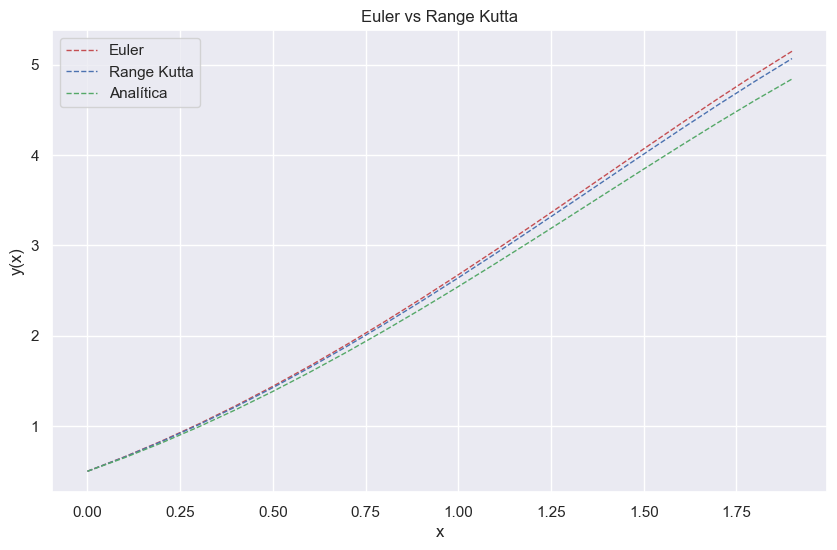

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale = 1, font='sans serif')
plt.figure(figsize=(10,6), facecolor = "#FFF")

plt.figure(1)
plt.rcParams.update({'font.size': 10})
plt.plot(x, F, 'r--', linewidth = 1, label = 'Range Kutta')
plt.plot(x, analic, 'b--', linewidth = 1, label = "Analítica")
plt.plot(x, E, 'g--', linewidth = 1, label = "Euler")
plt.title('Euler vs Range Kutta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(['Euler', 'Range Kutta', "Analítica"])
plt.grid(True)
plt.show()

# Range Kutta vs Euler Melhorado

In [95]:
#Derivada
def f(x,y): 
    return -0.800 * y**(3/2) + 10 * 2000 * (1 - np.exp(-3 * x))

# #Analítica
# def analitf(t): 
#     return (t+1.0)**2 - np.exp(t)/2.0

a = 0
b = 2
h = 2 / 250
y0 = 2000

n = int((b - a) / h) + 1

# Euler Melhorado

def euler_melhorado(a, b, h, y0, n):
    
    x = np.linspace(a, b, n)
    y = [0] * n
    y[0] = y0

    for i in np.arange(0, n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + (h/2) * (k1 + k2)
        
        
                
    return (x,y)

def range_kutt(a, b, h, y0, n):
    
    x = np.linspace(a, b, n)
    y = [0] * n
    y[0] = y0

    for i in np.arange(0, n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + (h/2) * (k1 + k2)
        
        k1 = f(x[i],y[i])
        k2 = f(x[i] + (h/2), y[i] + (h/2) * k1)
        k3 = f(x[i] + h, y[i] + h * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
            
        y[i+1] = y[i] + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)
     
                
    return (x,y)


In [100]:
x, y = euler_melhorado(a, b, h, y0,n)
# print (f'Solução x: {x}')
# print (f'Solução y: {y}')
# for point in sol:
#     print(f'x = {point[2]:.4f}, y = {point[3]:.4f}')

In [102]:
x1, y1 = range_kutt(a, b, h, y0,n)
# print (f'Solução x: {x1}')
# print (f'Solução y: {y1}')

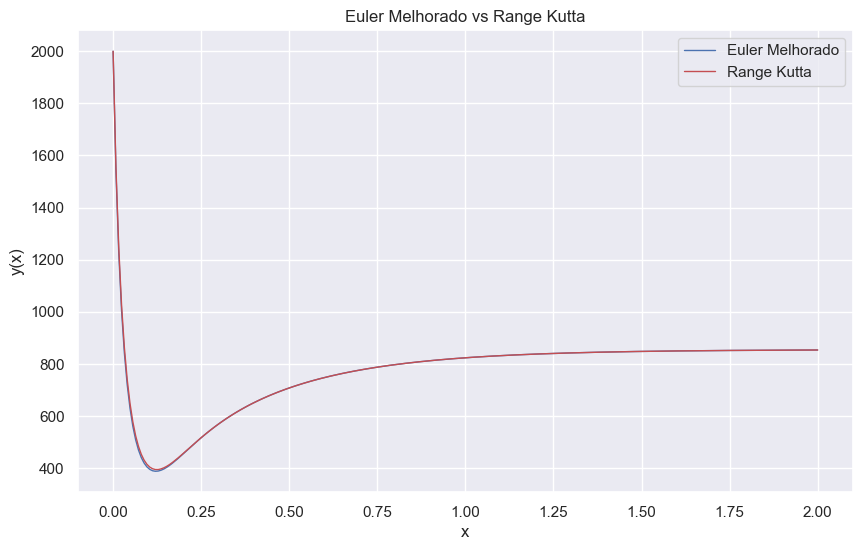

In [98]:
# Gráfico Euler Melhorado

sns.set(font_scale = 1, font='sans serif')
plt.figure(figsize=(10,6), facecolor = "#FFF")

plt.figure(1)
plt.rcParams.update({'font.size': 10})
plt.plot(x,y, 'b', linewidth = 1, label = "Euler Melhorado")
plt.plot(x1,y1, 'r', linewidth = 1, label = "Range Kutta")
plt.title('Euler Melhorado vs Range Kutta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(['Euler Melhorado' , "Range Kutta"])
plt.grid(True)
plt.show()